In [25]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import numpy as np

In [2]:
import matplotlib as mpl

mpl.rcParams['text.color'] = 'w'
mpl.rcParams['xtick.color'] = 'w'
mpl.rcParams['ytick.color'] = 'w'
mpl.rcParams['axes.labelcolor'] = 'w'

In [79]:
# Read in data
data_red = pd.read_csv("winequality-red.csv", sep=";")
data_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


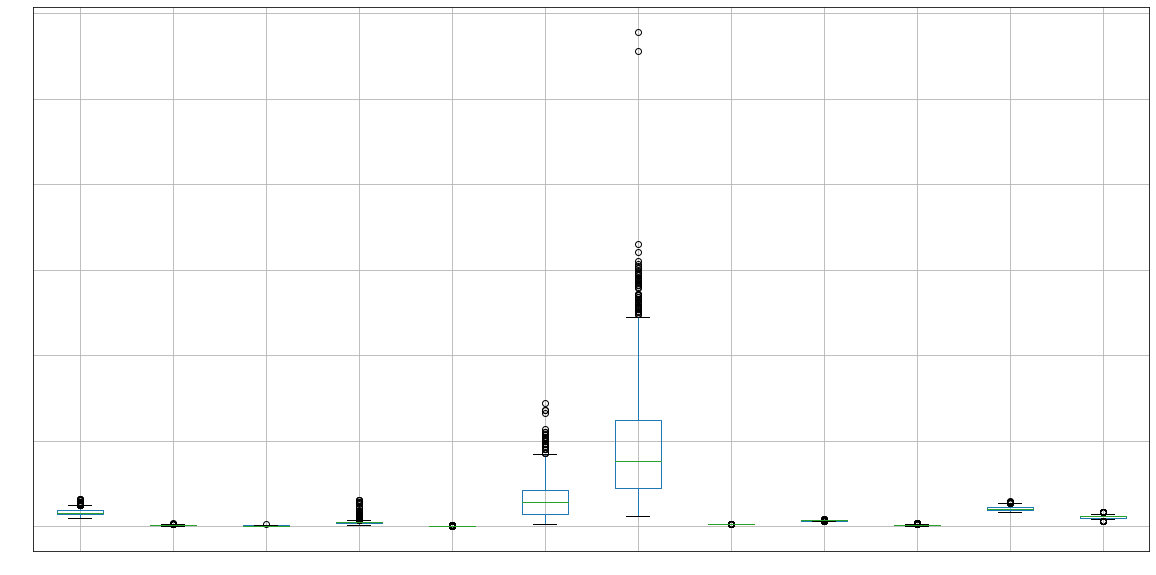

In [6]:
# Visualize outliers using boxplots
plt.figure(figsize = (20,10))
data_red.boxplot()
plt.show()

In [20]:
# Each varible is of a different scale - we need to standardize
# Create a StandardScaler object
scaler = preprocessing.MinMaxScaler()
# Apply fit_transform to our dataframe. This returns a numpy array
np_scaled = scaler.fit_transform(data_red)
# Create a dataframe out of the numpy array. Set column names to be the same as initial dataframe
scaled_data_red = pd.DataFrame(np_scaled, columns = data_red.columns)
scaled_data_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [21]:
scaled_data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


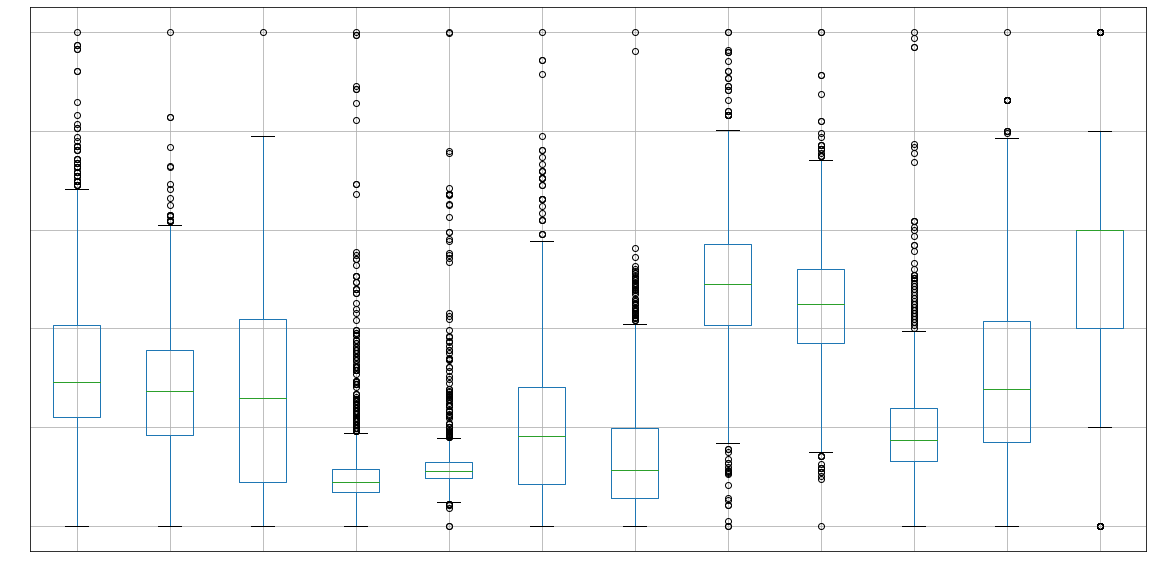

In [22]:
# Visualize standardized data using boxplots
plt.figure(figsize = (20,10))
scaled_data_red.boxplot()
plt.show()

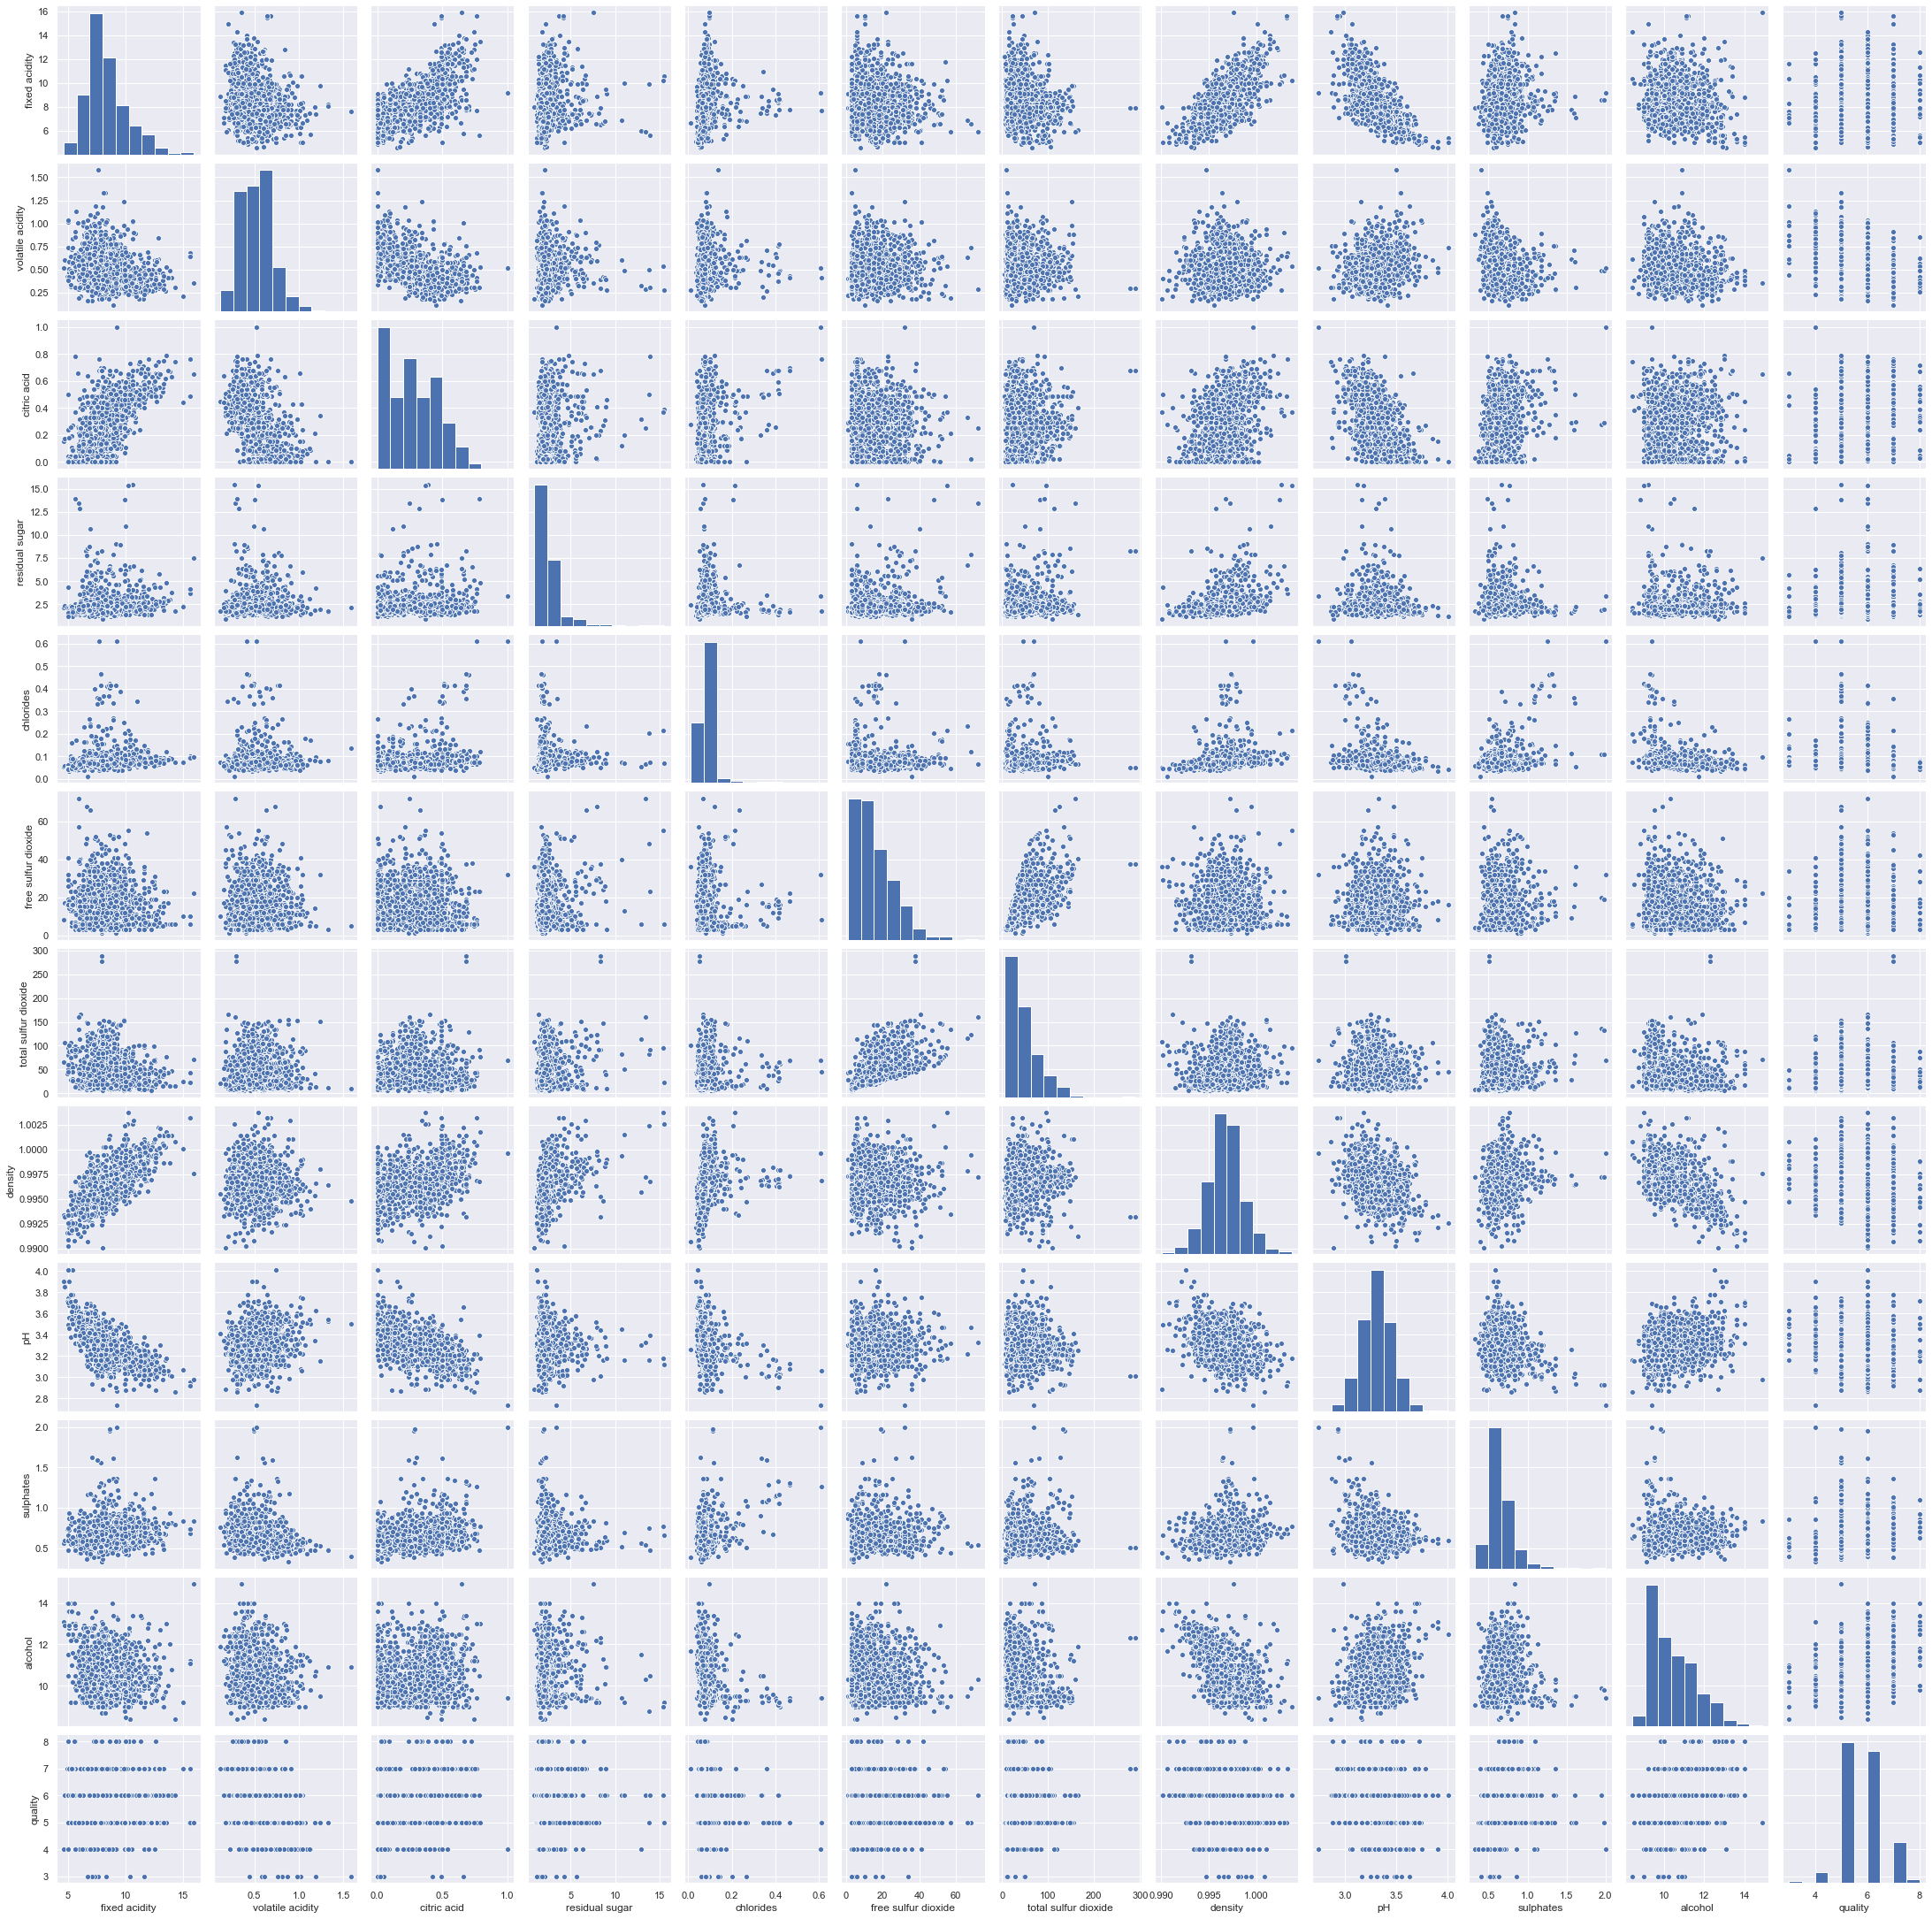

In [24]:
# Visualize data using pairplot
sns.set()
sns.pairplot(data_red)
plt.show()

In [77]:
# Create a copy of the dataframe in which we will flag outliers
outliers_red1 = data_red

In [81]:
# Identify any values which are less than Q1-1.5xIQR or greater than Q3+1.5xIQR
# Calculate q1, q3, interquartile range, lower limit and upper limit for residual sugar column
q1 = np.percentile(data_red['residual sugar'],25)
q3 = np.percentile(data_red['residual sugar'],75)
iqr = q3 - q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)

In [80]:
# Find values in residual sugar column that meet criteria
outliers_red1['residual sugar'] = np.where((data_red['residual sugar'] < lower) |
                                          (data_red['residual sugar'] > upper),
                                          'outlier', # value if True
                                          data_red['residual sugar']) # value if False

In [83]:
outliers_red1['residual sugar'][outliers_red1['residual sugar']=='outlier'].count()

155

In [87]:
# Treat them by imputing with the mean of the column
rs_mean = data_red['residual sugar'].mean()
outliers_red1['residual sugar'] = np.where((data_red['residual sugar'] < lower) |
                                          (data_red['residual sugar'] > upper),
                                          rs_mean, # value if True
                                          data_red['residual sugar']) # value if False

In [89]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [88]:
outliers_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.214643,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,0.439827,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.538806,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,3.650000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Create a copy of the dataframe in which we will flag outliers
outliers_red2 = data_red

In [ ]:
# Identify any residual sugar values which are greater than 3 standard deviations away from the mean
# Treat these by dropping the rows
